# Hist Logo generation

This makes the Hist logo using Hist, matplotlib, and Pillow.

In [1]:
import matplotlib.pyplot as plt
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFilter
import PIL.ImageFont
import numpy as np
import hist

In [2]:
image = PIL.Image.new("L", (350, 150), color=255)

draw = PIL.ImageDraw.Draw(image)

# use a truetype font
font = PIL.ImageFont.truetype("Arial Bold.ttf", 140)

draw.text((30, 0), "Hist", font=font)

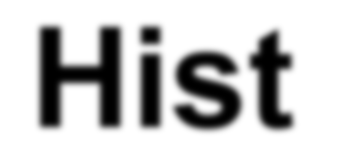

In [3]:
newimage = image.filter(PIL.ImageFilter.GaussianBlur(3))
newimage

In [4]:
arr = 255 - np.asarray(newimage)

In [5]:
h = hist.Hist(
    hist.axis.Regular(350, 0, 3.5), hist.axis.Regular(150, 0, 1.5), data=arr.T[:, ::-1]
)

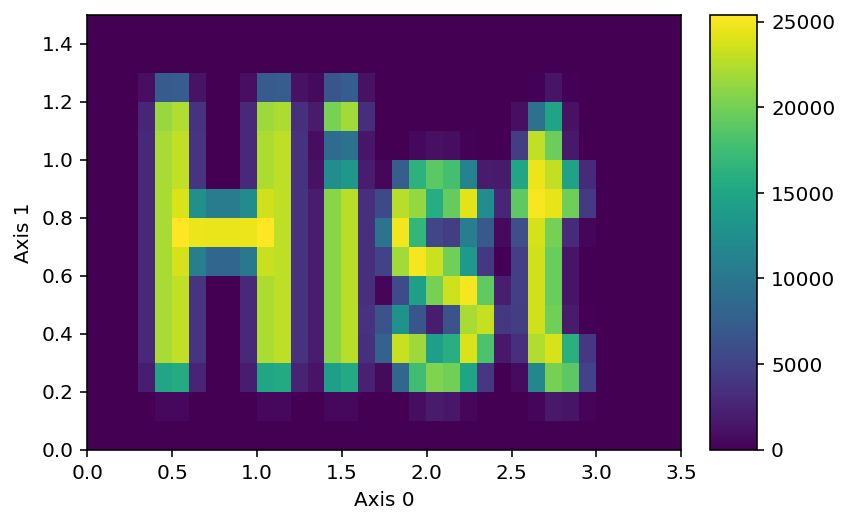

In [6]:
h2 = h[::10j, ::10j]
h2.plot();

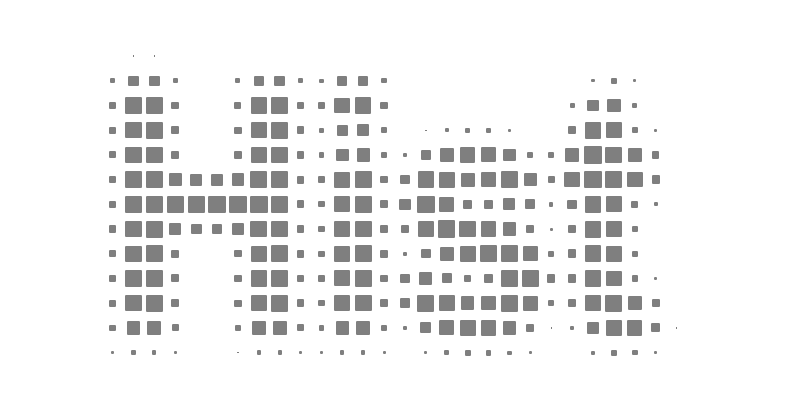

In [7]:
x, y = np.broadcast_arrays(*h2.axes.centers)

fig, ax = plt.subplots(frameon=False, figsize=(7, 3.5))
ax.axis("off")
ax.scatter(x, y, 60 * h2.values() / np.max(h2.values()), marker="s", color="#7f7f7f")

# fig.savefig("histlogo.svg", transparent=True)
# fig.savefig("histlogo.png", transparent=True)